# Proyecto de curso de data science en Python
Adicional a los paquetes vistos en clase instalar: 
* scikit-learn 
* seaborn


In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} scikit-learn

In [2]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

Usando sclicing con NumPy separar los datos en 2 datasets:
* entrenamiento(80%)
* validación y pruebas(20%) 


In [3]:
import numpy as np

Se importan los datos de entrada 

In [4]:
dataset = np.load('proyecto_training_data.npy')

Se separan los datos en **test** y **train**

In [5]:
datatrain = dataset[: int(len(dataset) * .80)]
datatest =  dataset[int(len(dataset) * .80):]

Se hará en análisis exploratiorio, calculando 
* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 

para cada variable del dataset.

Primero se crea una función que calcule los valores anteriormente descritos para un vector cualquiera


In [6]:
def explore(data):
    print("mean: "+str(np.nanmean(data)))
    min_data = np.nanmin(data)
    max_data = np.nanmax(data)
    print("max: "+str(max_data))
    print("min: "+str(min_data))
    print("range: " +str(max_data - min_data))
    print("sd: "+str(np.nanstd(data)))

Ahora pasamos cada variable independiente del data set

In [7]:
names = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd","YearBuilt","LotFrontage"]
def exploreDataset(matrix):
    for i in range(1,len(matrix.T)):
        print("-------------EXPLORING: "+names[i]+" --------------------------------")
        explore(matrix[:,i])
        
exploreDataset(dataset)

-------------EXPLORING: OverallQual --------------------------------
mean: 6.0993150684931505
max: 10.0
min: 1.0
range: 9.0
sd: 1.3825228366585953
-------------EXPLORING: 1stFlrSF --------------------------------
mean: 1162.626712328767
max: 4692.0
min: 334.0
range: 4358.0
sd: 386.45532230228963
-------------EXPLORING: TotRmsAbvGrd --------------------------------
mean: 6.517808219178082
max: 14.0
min: 2.0
range: 12.0
sd: 1.624836553698191
-------------EXPLORING: YearBuilt --------------------------------
mean: 1971.267808219178
max: 2010.0
min: 1872.0
range: 138.0
sd: 30.192558810489448
-------------EXPLORING: LotFrontage --------------------------------
mean: 70.04995836802665
max: 313.0
min: 21.0
range: 292.0
sd: 24.27463944767604


In [8]:
import pandas as pd
pd.DataFrame(datatrain) 

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


Ahora usaremos seaborn para graficar cada los datos descritos anteriormente de cada variable

In [9]:
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


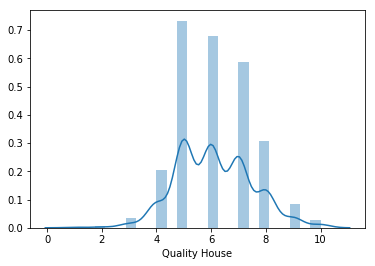

In [10]:
sns.distplot(datatrain[:,1],axlabel ="Quality House")

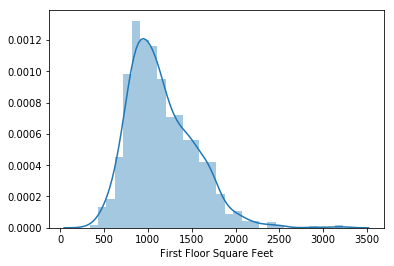

In [11]:
sns.distplot(datatrain[:,2],axlabel ="First Floor Square Feet")

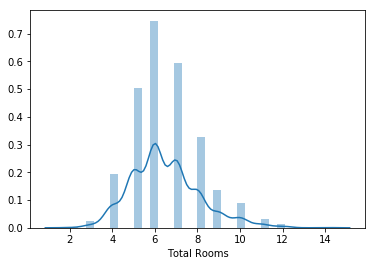

In [12]:
sns.distplot(datatrain[:,3],axlabel ="Total Rooms")

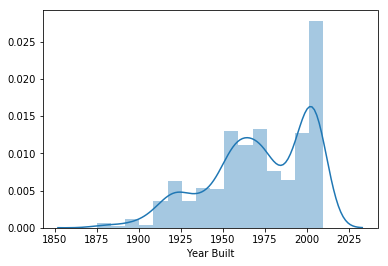

In [13]:
sns.distplot(datatrain[:,4],axlabel ="Year Built")

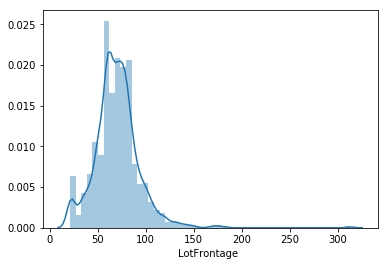

In [52]:
sns.distplot(datatrain[:,5][~np.isnan(datatrain[:,5])],axlabel ="LotFrontage ")

Para cada variable independiente x :
* Calcular el coeficiente de correlación entre x y y
* graficar x vs y(scatterplot) usando matplotlib
* Colocar el coeficiente de correlación como parte del título de la gráfica. 


In [14]:
import matplotlib.pyplot as plt 

In [15]:
def graphCorrelation(y,x,title):
    correlation = np.corrcoef(x,y)[1,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
    #ax = fig.add_subplot(111) 

    ax.scatter(x, y,marker='*')  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title+': '+str(correlation))

    plt.show()

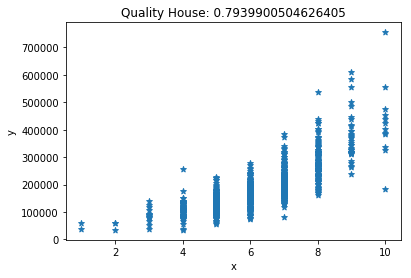

In [16]:
graphCorrelation(datatrain[:,0],datatrain[:,1],"Quality House")

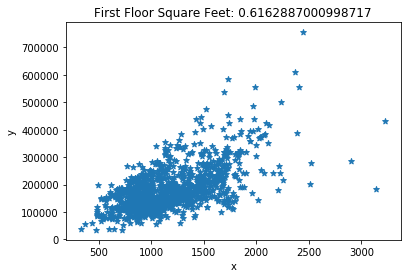

In [17]:
graphCorrelation(datatrain[:,0],datatrain[:,2],"First Floor Square Feet")

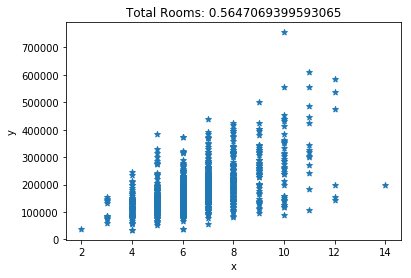

In [18]:
graphCorrelation(datatrain[:,0],datatrain[:,3],"Total Rooms")

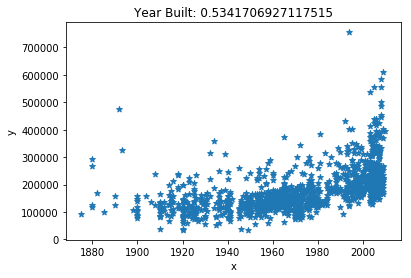

In [19]:
graphCorrelation(datatrain[:,0],datatrain[:,4],"Year Built")

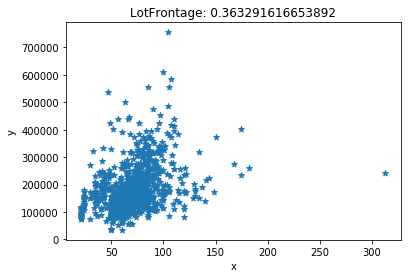

In [53]:
graphCorrelation(datatrain[:,0][~np.isnan(datatrain[:,5])],datatrain[:,5][~np.isnan(datatrain[:,5])],"LotFrontage")

Con base a la correlación de las variables independientes analizadas, se obtuvo que las variables que más se correlacionan son:
* Calidad de la casa (1)
* Pies cuadrados del primer piso de la casa (2)

Crear una función para entrenar un modelo de regresión lineal de una variable 
y = mx +b.

In [20]:
def training(x,y,epoch,imprimir_error_cada,learning_rate):
    matrix = np.column_stack([x,np.ones(len(x))])
    m_b = np.array([0,0])
    error_vector = np.array([])
    model_dictionary = {}
    for i in range(0,epoch):
        yhat = np.matmul(matrix,m_b)
        y_yhat = (y-yhat)
        error = 0.5*np.average(y_yhat**2)
        if i % imprimir_error_cada == 0:
            print("iteration: "+str(i)+" error: "+str(error))
        error_vector = np.append(error_vector,error)
        gradient = np.matmul((yhat-y),matrix)/len(matrix)
        model_dictionary[str(i)] = m_b
        m_b = m_b - learning_rate * gradient
    return (error_vector,model_dictionary)
    

Ahora graficamos el error para ver cómo se comporta.

In [21]:
import matplotlib.pyplot as plt
def graphError(errorMatrix):
    plt.plot(errorMatrix)
    plt.show()

Se crea una función para graficar la evolución de los modelos en cada iteración

In [22]:
def graphModelsHistory(models, x_values,y_real_values, n):
    fig = plt.figure(figsize=(20, 20))
    plotCounter = 1
    for i in range(0,len(models),n):
        values = np.matmul(x_values,models[str(i)])
        ax = fig.add_subplot(5,3,plotCounter)
        plotCounter+=1
        ax.plot(x_values[:,0],values)
        ax.scatter(x_values[:,0],y_real_values, c="blue", alpha=0.5)
        


# Entrenando la primer variable independiente (Overall)
Se establece un modelo para la primer variable seleccionada (Overall)

In [23]:
(erOverall,modelsOverall) =training(datatrain[:,1],datatrain[:,0],401,50, 0.0491)

iteration: 0 error: 19409722053.22175
iteration: 50 error: 2009261050.6076527
iteration: 100 error: 1327142477.6662521
iteration: 150 error: 1271122854.9368238
iteration: 200 error: 1244644471.9031289
iteration: 250 error: 1224326243.8431559
iteration: 300 error: 1208251474.5920045
iteration: 350 error: 1195515460.7725224
iteration: 400 error: 1185424054.1482604


Se grafica el error del Overall

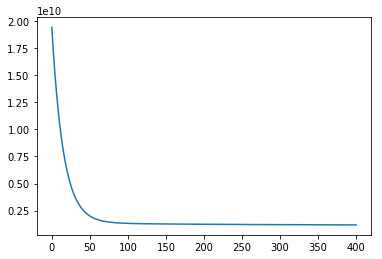

In [24]:
graphError(erOverall)

Se grafica la evolución del modelo del Overall con n = 80

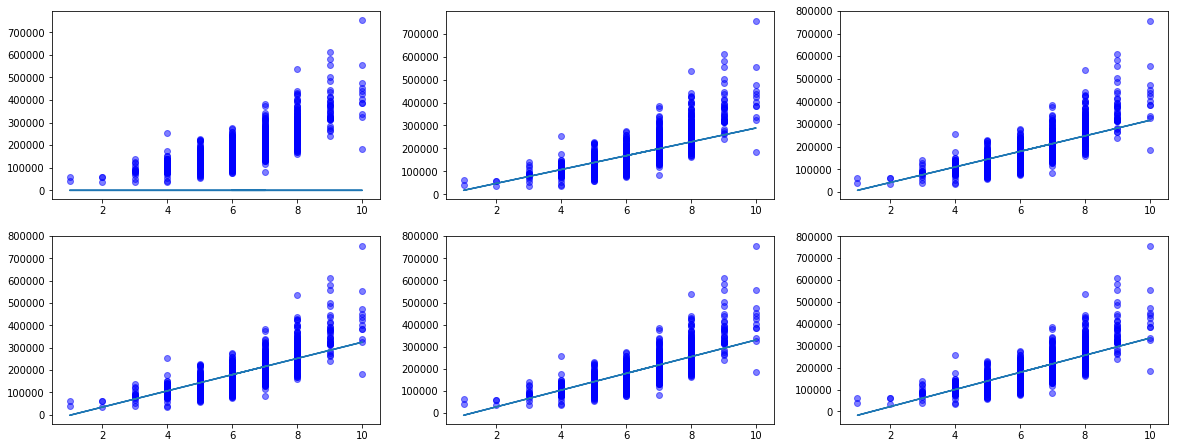

In [25]:
graphModelsHistory(modelsOverall,np.column_stack([datatrain[:,1],np.ones(len(datatrain[:,1]))]),datatrain[:,0],80)

# Entrenando la segunda variable independiente (1stFlrSF)
Se establece un modelo para la segunda variable seleccionada (1stFlrSF)

In [26]:
(er1First,models1First) =training(datatrain[:,2],datatrain[:,0],101,50, 0.0000009999)

iteration: 0 error: 19409722053.22175
iteration: 50 error: 1968092675.7783813
iteration: 100 error: 1968092264.9525485


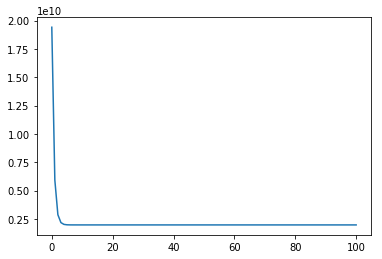

In [27]:
graphError(er1First)

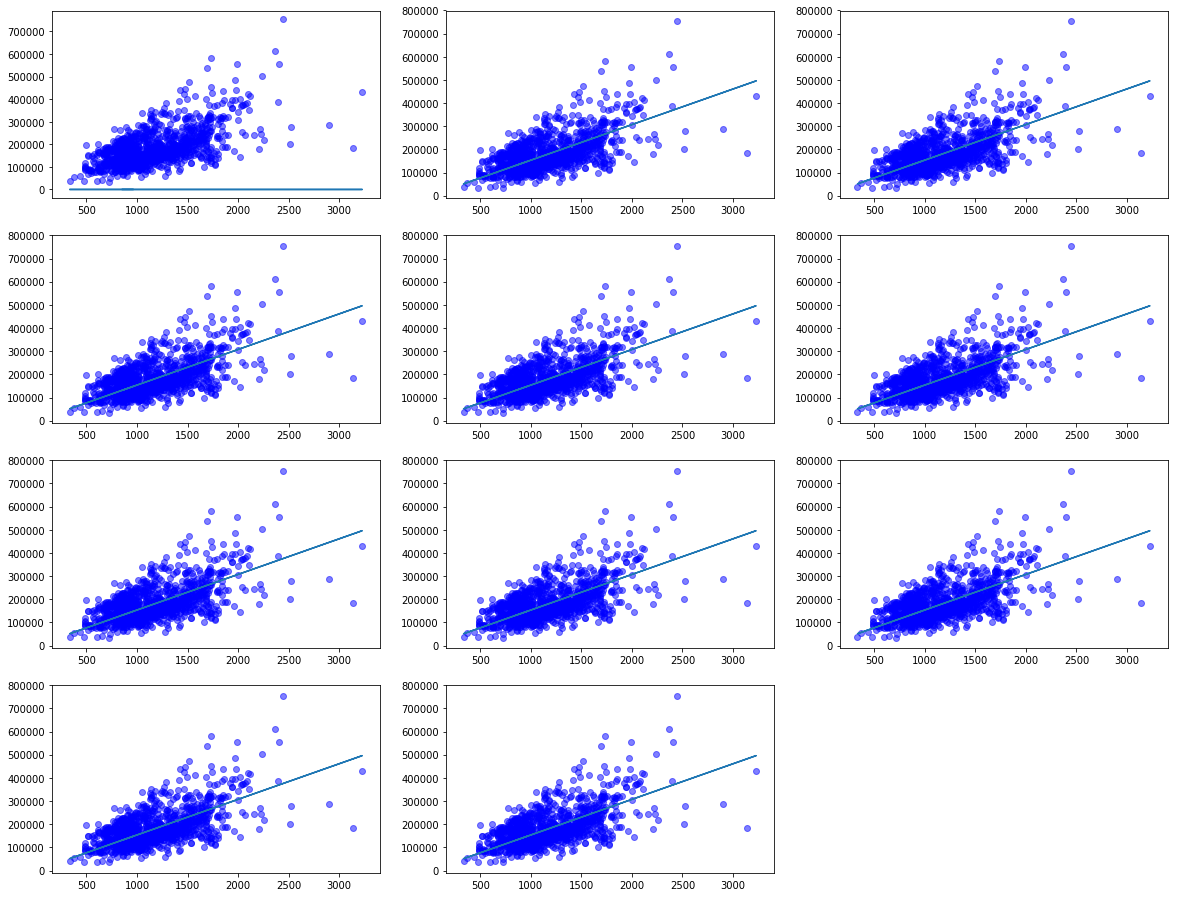

In [28]:
graphModelsHistory(models1First,np.column_stack([datatrain[:,2],np.ones(len(datatrain[:,2]))]),datatrain[:,0],10)

# Creando el modelo con sklearn

In [29]:
from sklearn.linear_model import LinearRegression

Trabajando la variable Overall con sci kit learn

In [30]:
regressionOverall = LinearRegression(fit_intercept=False).fit(datatrain[:,1].reshape(-1,1), datatrain[:,0])

Creamos una función de predicción para el modelo manual

In [31]:
def predictionOverall(x_value):
    return np.matmul(np.column_stack([x_value,np.ones(len(x_value))]),modelsOverall[str(len(modelsOverall)-1)])

In [32]:
print("manual model: "+str(predictionOverall(np.array([7,2]))))
print("sci learn model: "+str(regressionOverall.predict(np.array([[7],[2]]))))

manual model: [217707.17326355  21758.34238382]
sci learn model: [212568.06839272  60733.73382649]


In [33]:
def analyzeBothModelsOverall(x_values):
    manualPrediction = predictionOverall(x_values)
    sklearnPrediction = regressionOverall.predict(x_values.reshape(-1,1))
    average = manualPrediction+sklearnPrediction/len(manualPrediction)
    return manualPrediction,sklearnPrediction,average

In [34]:
analyzeBothModelsOverall(datatrain[:,1])

(array([217707.17326355, 178517.4070876 , 217707.17326355, ...,
        217707.17326355, 256896.93943949, 178517.4070876 ]),
 array([212568.06839272, 182201.20147947, 212568.06839272, ...,
        212568.06839272, 242934.93530596, 182201.20147947]),
 array([217889.16647279, 178673.40126695, 217889.16647279, ...,
        217889.16647279, 257104.93167862, 178673.40126695]))

Trabajando la variable 1stFlrSF

In [35]:
regression1SF = LinearRegression(fit_intercept=False).fit(datatrain[:,2].reshape(-1,1), datatrain[:,0])

In [36]:
def prediction1SF(x_value):
    return np.matmul(np.column_stack([x_value,np.ones(len(x_value))]),models1First[str(len(models1First)-1)])

In [37]:
print("manual model: "+str(prediction1SF(np.array([800,900,1145]))))
print("sci learn model: "+str(regression1SF.predict(np.array([[800],[900],[1145]]))))

manual model: [122957.87907871 138327.56309046 175983.28891926]
sci learn model: [122957.7258321  138327.44156111 175983.24509719]


In [38]:
def analyzeBothModels1SF(x_values):
    manualPrediction = prediction1SF(x_values)
    sklearnPrediction = regression1SF.predict(x_values.reshape(-1,1))
    average = manualPrediction+sklearnPrediction/len(manualPrediction)
    return manualPrediction,sklearnPrediction,average

In [39]:
analyzeBothModels1SF(datatrain[:,2])

(array([131564.90212529, 193965.81921301, 141401.49989282, ...,
        230853.06084122, 260362.85414378, 147395.6766574 ]),
 array([131564.76664035, 193965.81250014, 141401.38470691, ...,
        230853.13024976, 260362.98444947, 147395.57384123]),
 array([131677.54319262, 194131.8858333 , 141522.56272219, ...,
        231050.70906917, 260585.76765787, 147521.87149802]))

# Validación con datos de test
## Variable independiente "Overall"
Ahora vamos a usar el 20% de los datos de test para comprobar el error de cada modelo con la primer variable Overall.

Primero extraemos los datos que queremos usar

In [40]:
x_overall_test = datatest[:,1]
x_1SF_test = datatest[:,2]
y_test = datatest[:,0]

### Modelo manual
Vamos a hacer las predicciones para el modelo que se realizó manualmente

In [41]:
y_hat_overall_manual = predictionOverall(x_overall_test)
error_manual_overall = 0.5*np.average((y_hat_overall_manual-y_test)**2)
print(error_manual_overall)

1352598139.6847346


### Modelo generado con sklearn
Vamos a hacer las predicciones para el modelo que se realizó con sklearn

In [42]:
y_hat_overall_sklearn = regressionOverall.predict(x_overall_test.reshape(-1,1))
error_sklearn_overall = 0.5*np.average((y_hat_overall_sklearn-y_test)**2)
print(error_sklearn_overall)

1543132387.2482743


## Variable independiente "1stFlrSF"
### Modelo manual
Vamos a hacer las predicciones para el modelo que se realizó manualmente

In [43]:
y_hat_1SF_manual = prediction1SF(x_1SF_test)
error_manual_1SF = 0.5*np.average((y_hat_1SF_manual-y_test)**2)
print(error_manual_1SF)

2437912514.1775036


### Modelo generado con sklearn
Vamos a hacer las predicciones para el modelo que se realizó con sklearn

In [44]:
y_hat_1SF_sklearn = regression1SF.predict(x_1SF_test.reshape(-1,1))
error_sklearn_1SF = 0.5*np.average((y_hat_1SF_sklearn-y_test)**2)
print(error_sklearn_1SF)

2437915188.5809107


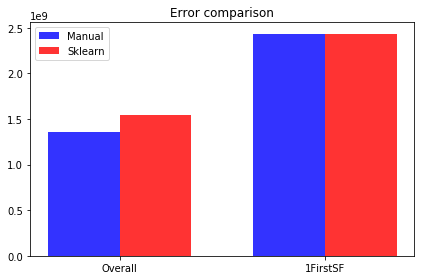

In [45]:
values_manual = [error_manual_overall,error_manual_1SF]
values_sklearn = [error_sklearn_overall,error_sklearn_1SF]
bar_width = 0.35
opacity = 0.8
index = np.arange(len(values_manual))
plt.title('Error comparison')
plt.bar(index, values_manual, bar_width,
alpha=opacity,
color='b',
label='Manual')
 
plt.bar(index + bar_width, values_sklearn, bar_width,
alpha=opacity,
color='r',
label='Sklearn')
plt.xticks(index + bar_width/2, ('Overall', '1FirstSF'))
plt.legend()
 
plt.tight_layout()
plt.show()

## Conclusiones
En la grafica anterior se puede observar el error para cada caso, las barras azules son para los modelos calculados de forma manual y los de color rojo son los modelos generados con sklearn.

* El modelo manual para la variable Overall es el más bajo, por lo que se puede decir que tiene aproximaciones relativamente confiables
* Los errores para la variable 1stFlrSF son bastante similares para ambos modelos y también tienen un error mayor a la variable Overall, lo cual hace sentido debido a que tiene menos correlación.